In [1]:
import os
import datetime
import time

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output

<IPython.core.display.Javascript object>


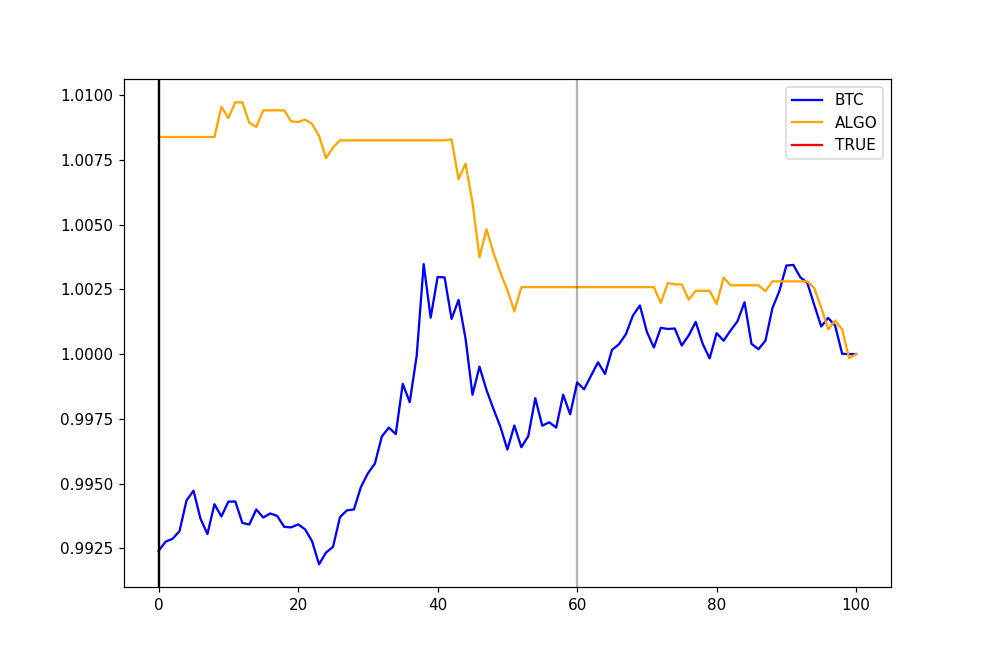

In [2]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [9, 6]

csv_path = "v2_log.csv"
start = 100
prev_time = 0

actions = False

def plot(bdf):
    clear_output(wait=True)
    fig,ax = plt.subplots(1,1)
    ax.plot(bdf['Close']/bdf['Close'][start], color='blue', label="BTC")
    ax.plot(bdf['Account Value']/bdf['Account Value'][start], color='orange', label="ALGO")
#     bdf.loc[bdf.index() < start, 'True Account'] = None
    ax.plot(bdf['True Account'][start:len(bdf)-1]/bdf['True Account'][start], color='red', label="TRUE")
    ax.legend()
    if actions:
        sell = bdf[bdf['Action'].shift(-1) == "SELL"].index
        buy = bdf[bdf['Action'].shift(-1) == "BUY"].index
        for s in sell:
            ax.axvline(x=s, color="red", alpha=0.5)
        for b in buy:
            ax.axvline(x=b, color="green", alpha=0.5)
#         sell = bdf[bdf['Current Want'].shift(-1) == "SELL"].index
#         buy = bdf[bdf['Current Want'].shift(-1) == "BUY"].index
#         for s in sell:
#             ax.axvline(x=s, color="red", alpha=0.3)
#         for b in buy:
#             ax.axvline(x=b, color="green", alpha=0.3)

    for i in range(len(bdf)):
        if i%60 == 0:
            ax.axvline(x=i, color="black", alpha=0.3)
        if i%(60*24) == 0:
            ax.axvline(x=i, color="black", alpha=1)
    fig.canvas.draw()

bdf = pd.read_csv(csv_path)
plot(bdf)
    
# while True:
#     t = int(time.time())
#     if t%60==10 and t != prev_time:
        
#         prev_time = t
#         bdf = pd.read_csv(csv_path)
#         plot(bdf)